In [1]:
import os
import tensorflow.keras as keras

os.environ["CUDA_VISIBLE_DEVICES"] = "0"

In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
from tensorflow.keras.regularizers import l1, l2, l1_l2

In [ ]:
# L1

In [6]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1(l1_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1(l1_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [7]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L1_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [8]:
results = {}

for regulizer_ratio in L1_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

50000/50000 [==============================] - 1s 16us/sample - loss: 2.4626 - accuracy: 0.0981 - val_loss: 2.4625 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.4626 - accuracy: 0.0984 - val_loss: 2.4626 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.4626 - accuracy: 0.0982 - val_loss: 2.4626 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________

50000/50000 [==============================] - 1s 16us/sample - loss: 2.8276 - accuracy: 0.6193 - val_loss: 3.1340 - val_accuracy: 0.5086
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.7901 - accuracy: 0.6229 - val_loss: 3.0139 - val_accuracy: 0.5331
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.7476 - accuracy: 0.6239 - val_loss: 3.0400 - val_accuracy: 0.5118
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.7118 - accuracy: 0.6249 - val_loss: 3.1153 - val_accuracy: 0.4907
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.6751 - accuracy: 0.6248 - val_loss: 2.9935 - val_accuracy: 0.5175
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.6350 - accuracy: 0.6286 - val_loss: 2.9805 - val_accuracy: 0.5110
Experiment with Regulizer = 0.000000
Model: "model"
____________________________________________________________

50000/50000 [==============================] - 1s 16us/sample - loss: 0.9686 - accuracy: 0.6569 - val_loss: 1.3820 - val_accuracy: 0.5250
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9559 - accuracy: 0.6638 - val_loss: 1.3652 - val_accuracy: 0.5268
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9447 - accuracy: 0.6673 - val_loss: 1.4190 - val_accuracy: 0.5182
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9340 - accuracy: 0.6707 - val_loss: 1.3638 - val_accuracy: 0.5341
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9228 - accuracy: 0.6749 - val_loss: 1.3942 - val_accuracy: 0.5292
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9079 - accuracy: 0.6813 - val_loss: 1.3814 - val_accuracy: 0.5255
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.8941 - accuracy: 0.6878 - va

50000/50000 [==============================] - 1s 16us/sample - loss: 1.0033 - accuracy: 0.6467 - val_loss: 1.3258 - val_accuracy: 0.5418
Epoch 40/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9885 - accuracy: 0.6542 - val_loss: 1.3530 - val_accuracy: 0.5240
Epoch 41/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9756 - accuracy: 0.6550 - val_loss: 1.4356 - val_accuracy: 0.5145
Epoch 42/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9587 - accuracy: 0.6649 - val_loss: 1.4594 - val_accuracy: 0.4998
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9459 - accuracy: 0.6680 - val_loss: 1.3384 - val_accuracy: 0.5412
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9369 - accuracy: 0.6704 - val_loss: 1.3651 - val_accuracy: 0.5312
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9245 - accuracy: 0.6787 - va

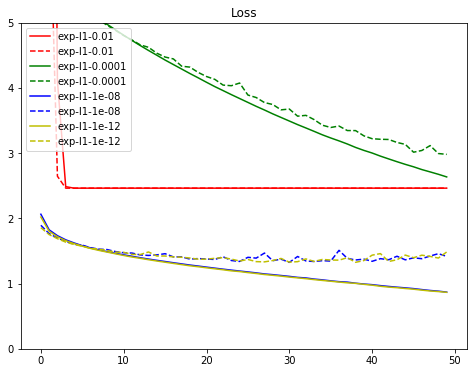

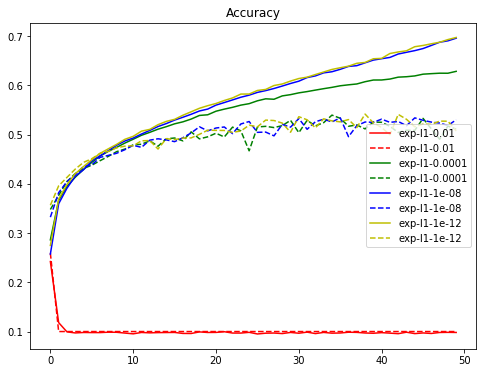

In [10]:
import matplotlib.pyplot as plt

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
# L2

In [11]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l2(l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l2(l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [12]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
L2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [13]:
results = {}

for regulizer_ratio in L2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

50000/50000 [==============================] - 1s 16us/sample - loss: 1.6172 - accuracy: 0.5230 - val_loss: 1.6703 - val_accuracy: 0.5035
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6142 - accuracy: 0.5232 - val_loss: 1.6643 - val_accuracy: 0.5017
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6095 - accuracy: 0.5266 - val_loss: 1.7457 - val_accuracy: 0.4660
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________

50000/50000 [==============================] - 1s 16us/sample - loss: 1.0764 - accuracy: 0.6715 - val_loss: 1.6022 - val_accuracy: 0.5074
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.0676 - accuracy: 0.6741 - val_loss: 1.5296 - val_accuracy: 0.5253
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.0494 - accuracy: 0.6831 - val_loss: 1.6552 - val_accuracy: 0.4908
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.0394 - accuracy: 0.6849 - val_loss: 1.4776 - val_accuracy: 0.5364
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.0334 - accuracy: 0.6871 - val_loss: 1.5905 - val_accuracy: 0.5199
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.0235 - accuracy: 0.6907 - val_loss: 1.5437 - val_accuracy: 0.5230
Experiment with Regulizer = 0.000000
Model: "model"
____________________________________________________________

50000/50000 [==============================] - 1s 16us/sample - loss: 0.9668 - accuracy: 0.6595 - val_loss: 1.3568 - val_accuracy: 0.5333
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9571 - accuracy: 0.6646 - val_loss: 1.3363 - val_accuracy: 0.5391
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9414 - accuracy: 0.6682 - val_loss: 1.4007 - val_accuracy: 0.5228
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9312 - accuracy: 0.6730 - val_loss: 1.3536 - val_accuracy: 0.5385
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9188 - accuracy: 0.6762 - val_loss: 1.3487 - val_accuracy: 0.5373
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9067 - accuracy: 0.6813 - val_loss: 1.4960 - val_accuracy: 0.5028
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9022 - accuracy: 0.6824 - va

50000/50000 [==============================] - 1s 16us/sample - loss: 1.0027 - accuracy: 0.6478 - val_loss: 1.3682 - val_accuracy: 0.5268
Epoch 40/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9862 - accuracy: 0.6550 - val_loss: 1.3731 - val_accuracy: 0.5264
Epoch 41/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9731 - accuracy: 0.6585 - val_loss: 1.3884 - val_accuracy: 0.5225
Epoch 42/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9606 - accuracy: 0.6601 - val_loss: 1.4227 - val_accuracy: 0.5177
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9426 - accuracy: 0.6697 - val_loss: 1.4033 - val_accuracy: 0.5227
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9329 - accuracy: 0.6728 - val_loss: 1.3660 - val_accuracy: 0.5288
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 0.9267 - accuracy: 0.6749 - va

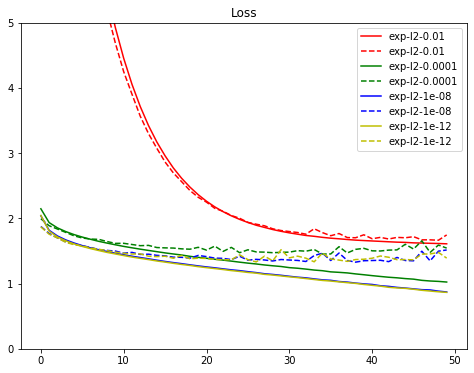

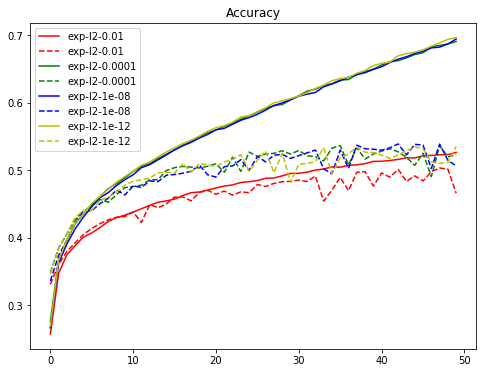

In [14]:
import matplotlib.pyplot as plt

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()

In [ ]:
# L1_L2

In [15]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128], l1_l2_ratio=1e-4):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1), 
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1),
                                   kernel_regularizer=l1_l2(l1_l2_ratio))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [16]:
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
l1_l2_EXP = [1e-2, 1e-4, 1e-8, 1e-12]

In [17]:
results = {}

for regulizer_ratio in l1_l2_EXP:
    keras.backend.clear_session()
    print("Experiment with Regulizer = %.6f" % (regulizer_ratio))
    model = build_mlp(input_shape=x_train.shape[1:], l1_l2_ratio=regulizer_ratio)
    model.summary()
    optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["accuracy"]
    valid_acc = model.history.history["val_accuracy"]
    
    exp_name_tag = "exp-l1_l2-%s" % str(regulizer_ratio)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}

Experiment with Regulizer = 0.010000
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [======

50000/50000 [==============================] - 1s 17us/sample - loss: 2.4614 - accuracy: 0.0993 - val_loss: 2.4615 - val_accuracy: 0.1000
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.4614 - accuracy: 0.0991 - val_loss: 2.4612 - val_accuracy: 0.1000
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 2.4614 - accuracy: 0.1001 - val_loss: 2.4614 - val_accuracy: 0.1000
Experiment with Regulizer = 0.000100
Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 3072)]            0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
________________________________________________

50000/50000 [==============================] - 1s 16us/sample - loss: 1.7742 - accuracy: 0.4719 - val_loss: 1.7834 - val_accuracy: 0.4708
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.7693 - accuracy: 0.4727 - val_loss: 1.8215 - val_accuracy: 0.4500
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.7640 - accuracy: 0.4755 - val_loss: 1.8073 - val_accuracy: 0.4559
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.7629 - accuracy: 0.4751 - val_loss: 1.7960 - val_accuracy: 0.4560
Epoch 49/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.7576 - accuracy: 0.4766 - val_loss: 1.7810 - val_accuracy: 0.4705
Epoch 50/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.7555 - accuracy: 0.4759 - val_loss: 1.8892 - val_accuracy: 0.4116
Experiment with Regulizer = 0.000000
Model: "model"
____________________________________________________________

50000/50000 [==============================] - 1s 16us/sample - loss: 1.6497 - accuracy: 0.5129 - val_loss: 1.7060 - val_accuracy: 0.4943
Epoch 43/50
50000/50000 [==============================] - 1s 17us/sample - loss: 1.6435 - accuracy: 0.5141 - val_loss: 1.6904 - val_accuracy: 0.4947
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6371 - accuracy: 0.5168 - val_loss: 1.6845 - val_accuracy: 0.4974
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6315 - accuracy: 0.5185 - val_loss: 1.6851 - val_accuracy: 0.5023
Epoch 46/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6287 - accuracy: 0.5187 - val_loss: 1.6833 - val_accuracy: 0.4948
Epoch 47/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6247 - accuracy: 0.5203 - val_loss: 1.6728 - val_accuracy: 0.4985
Epoch 48/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6199 - accuracy: 0.5198 - va

50000/50000 [==============================] - 1s 16us/sample - loss: 1.6694 - accuracy: 0.5080 - val_loss: 1.7278 - val_accuracy: 0.4842
Epoch 40/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6629 - accuracy: 0.5099 - val_loss: 1.7165 - val_accuracy: 0.4904
Epoch 41/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6562 - accuracy: 0.5125 - val_loss: 1.6949 - val_accuracy: 0.4932
Epoch 42/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6485 - accuracy: 0.5117 - val_loss: 1.7400 - val_accuracy: 0.4825
Epoch 43/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6442 - accuracy: 0.5140 - val_loss: 1.7076 - val_accuracy: 0.4852
Epoch 44/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6365 - accuracy: 0.5151 - val_loss: 1.6833 - val_accuracy: 0.5005
Epoch 45/50
50000/50000 [==============================] - 1s 16us/sample - loss: 1.6327 - accuracy: 0.5166 - va

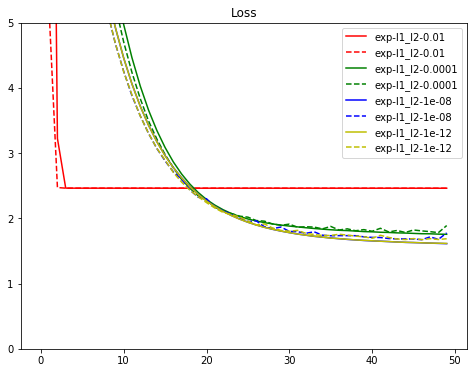

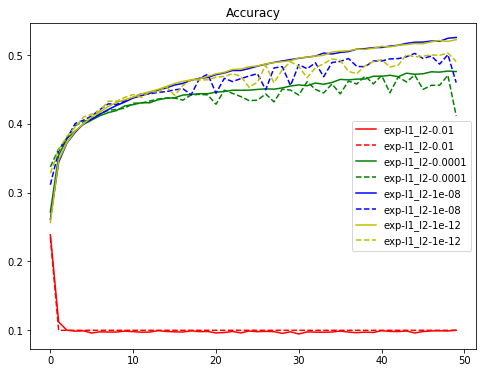

In [18]:
import matplotlib.pyplot as plt

color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()